In [21]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\linkedin-reviews - linkedin-reviews.csv")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


## Exploratory Data Analysis 

we will start by analyzing the distribution of ratings. it will provide insight into the overall sentiment of the reviews . Then we can explore further , such as analyzing the length of reviews  ,  and posasibly desire insights from the text of the reviews . 

## Plotting the Distribution of Ratings 

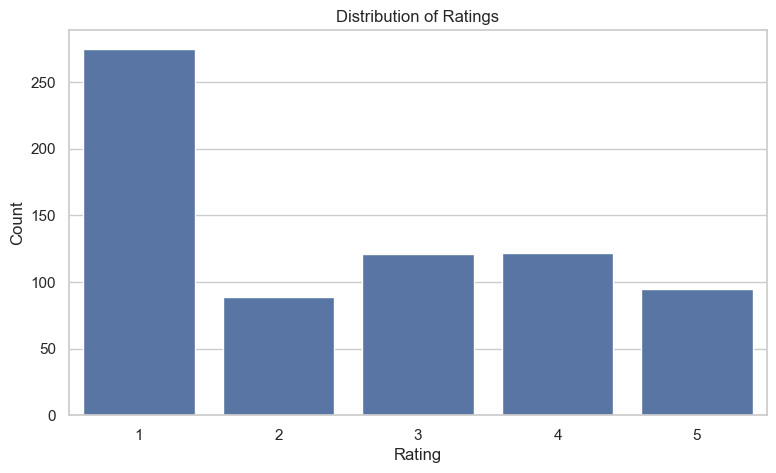

In [9]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Adding Sentiment Labels in the Data 

we will use Textblob library . Textblob provides a polarity scores raning from -1(very negative) to 1 (very positive)
for a given text . We can usethis score to classify each review's sentimnet as positive , netural OR negative .

In [11]:

pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob

In [13]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return "Positive"

    elif sentiment.polarity < -0.1 :
        return "Negative"

    else :
        return "Netural"

In [15]:
df['Sentiment'] = df ['Review'].apply(textblob_sentiment_analysis)

In [16]:
df.sample(5)

,Review,Rating,Sentiment
184,Cannot edit profile...minus points!,3,Netural
519,"Has features we expect-contact integration, gr...",4,Netural
371,"Great for keeping up, but doesn't replace pc",4,Positive
451,Someone pls fix this app.,1,Netural
52,Forces close on every action was working till ...,3,Netural


## Anayzing App Review Sentiments 

In [17]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Netural     300
Positive    295
Negative    107
Name: count, dtype: int64

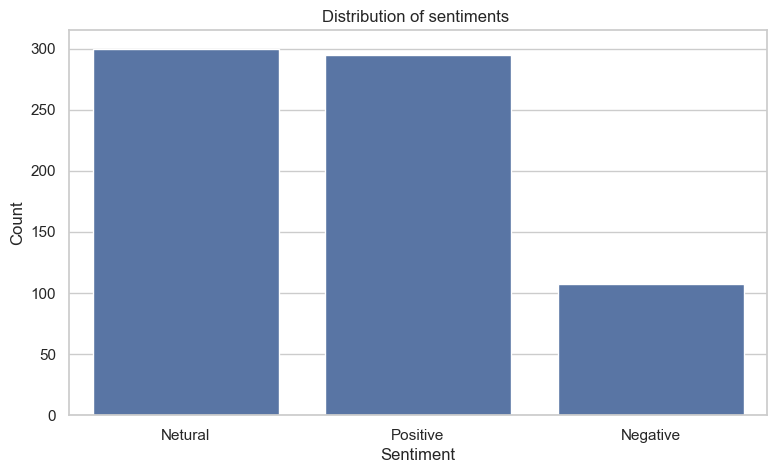

In [19]:
plt.figure(figsize = (9,5))
sns.barplot(x= sentiment_distribution.index,
            y = sentiment_distribution.values )

plt.title('Distribution of sentiments ')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## so , we can see althrough the appp has low rating , still the reviews don't use many negative words in the reviews for the app . 

Next , we'll explore the relationshop between sentiments and the ratings .  This analysis  can help us understand 
whether there is a correlation betweeen the sentimnets of the text and numerical ratings . 

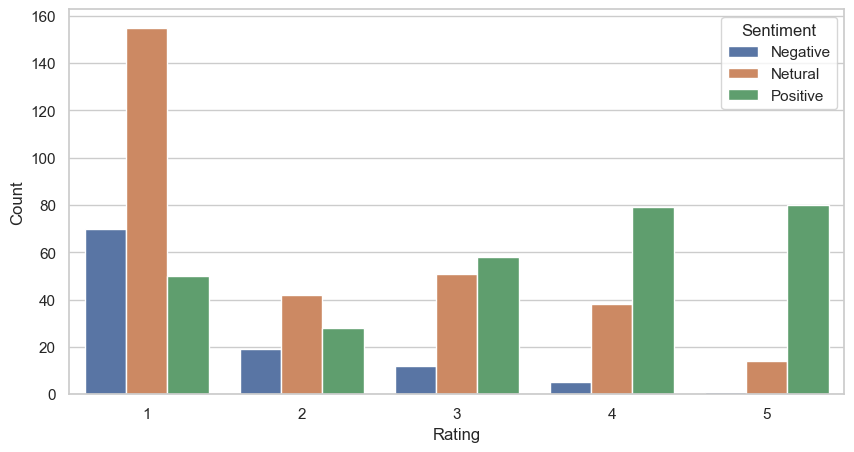

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(data = df ,
             x = 'Rating' , hue = 'Sentiment')


plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'Sentiment')
plt.show()

## Summary 

Summary
App reviews sentiment analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments expressed in reviews are positive, negative, or neutral.